In [2]:
%%time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})
# datetime processing
import datetime as datetime
from datetime import datetime as dt
today=dt.today()

# today = datetime.date(month=today.month, day=today.day, year=today.year)
yesterday=today-datetime.timedelta(days=1)

import pylab
pylab.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

#custom fetch
import fetcher
fetcher.fetch()
print(f"LOCAL FETCH: world_{today.strftime('%b-%d-%Y')}.csv")
df = pd.read_csv(f"world_{today.strftime('%b-%d-%Y')}.csv",index_col='date', parse_dates=True)
print("LOCAL FETCH COMPLETE.")
#custom fetch

usa=df[df['location'] == 'United States']
# usa_rolling7=usa.new_deaths.rolling(7).mean().fillna(0)
usa_daily=usa['total_deaths'].diff(1)
yesterday=usa_daily[-1]
usa_rolling7=usa_daily.rolling(7).mean()

File ~ world_Jan-18-2022.csv ~ Already Exists
LOCAL FETCH: world_Jan-18-2022.csv
LOCAL FETCH COMPLETE.
Wall time: 1.85 s


# <font color ='lime'>

# <font color=#cf0234> Total COVID-19 Deaths in United States as of Today </font>

In [3]:
# sigma_cases=sum(usa_daily.fillna(0))
print(f"USA TOTAL DEATH COUNT: {sum(usa_daily.fillna(0)):,} as of "+today.strftime("%A")+' '+str( today))

USA TOTAL DEATH COUNT: 852,061.0 as of Tuesday 2022-01-18 19:02:30.783689


# <font color=#cf0234> Yesterday's Deaths </font>
   

In [4]:
print(f"Yesterday's Deaths {today}: ",f"{yesterday:,}")

Yesterday's Deaths 2022-01-18 19:02:30.783689:  1,131.0


# <font color=#cf0234> Most recent daily deaths </font>
   

[]

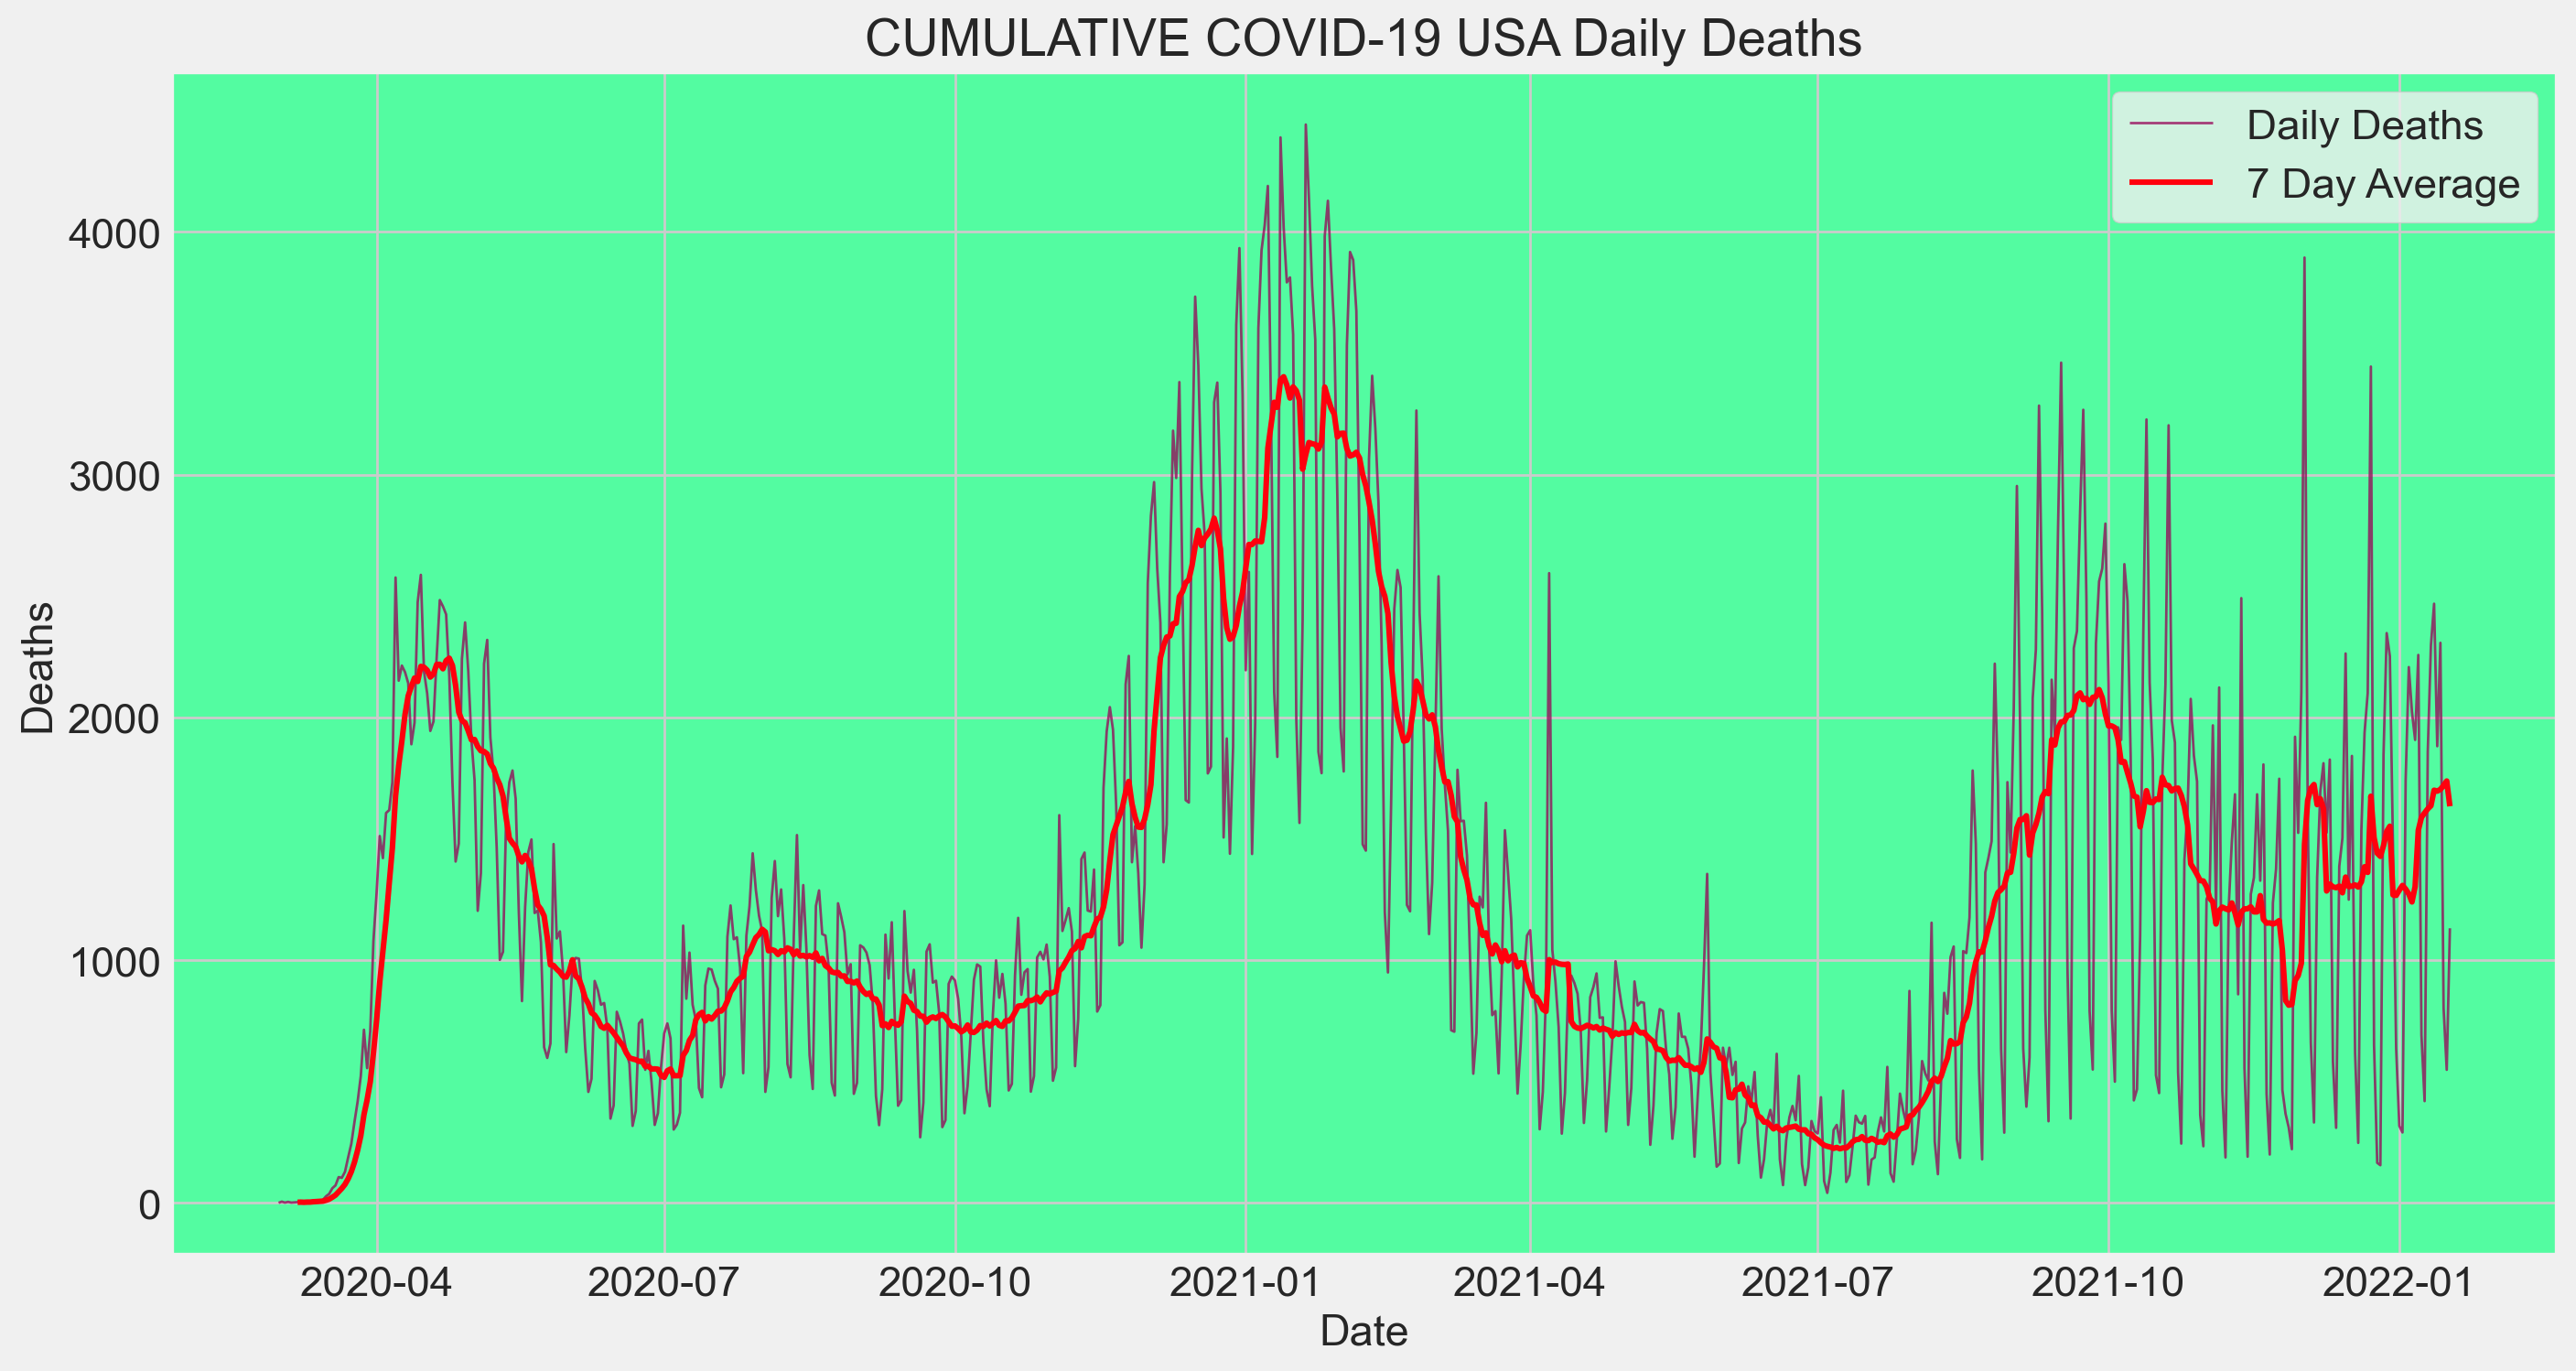

In [5]:
fig = plt.figure(figsize=(15,8),dpi=200)
x1=usa['total_deaths'].diff(1)
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056',label='Daily Deaths',lw=1,alpha=0.75)
ax=sns.lineplot(data=usa_rolling7, x=usa_rolling7.index,y=usa_rolling7,color='#ff000d',label='7 Day Average',lw=2.2)
ax.set_title('CUMULATIVE COVID-19 USA Daily Deaths')
ax.set_facecolor('xkcd:sea green')
ax.set_ylabel("Deaths")
ax.set_xlabel("Date")
plt.plot()
# fig.savefig(f'{today}_covid_deaths_all.png',dpi=165, bbox_inches='tight')

Text(0.5, 0, 'Date')

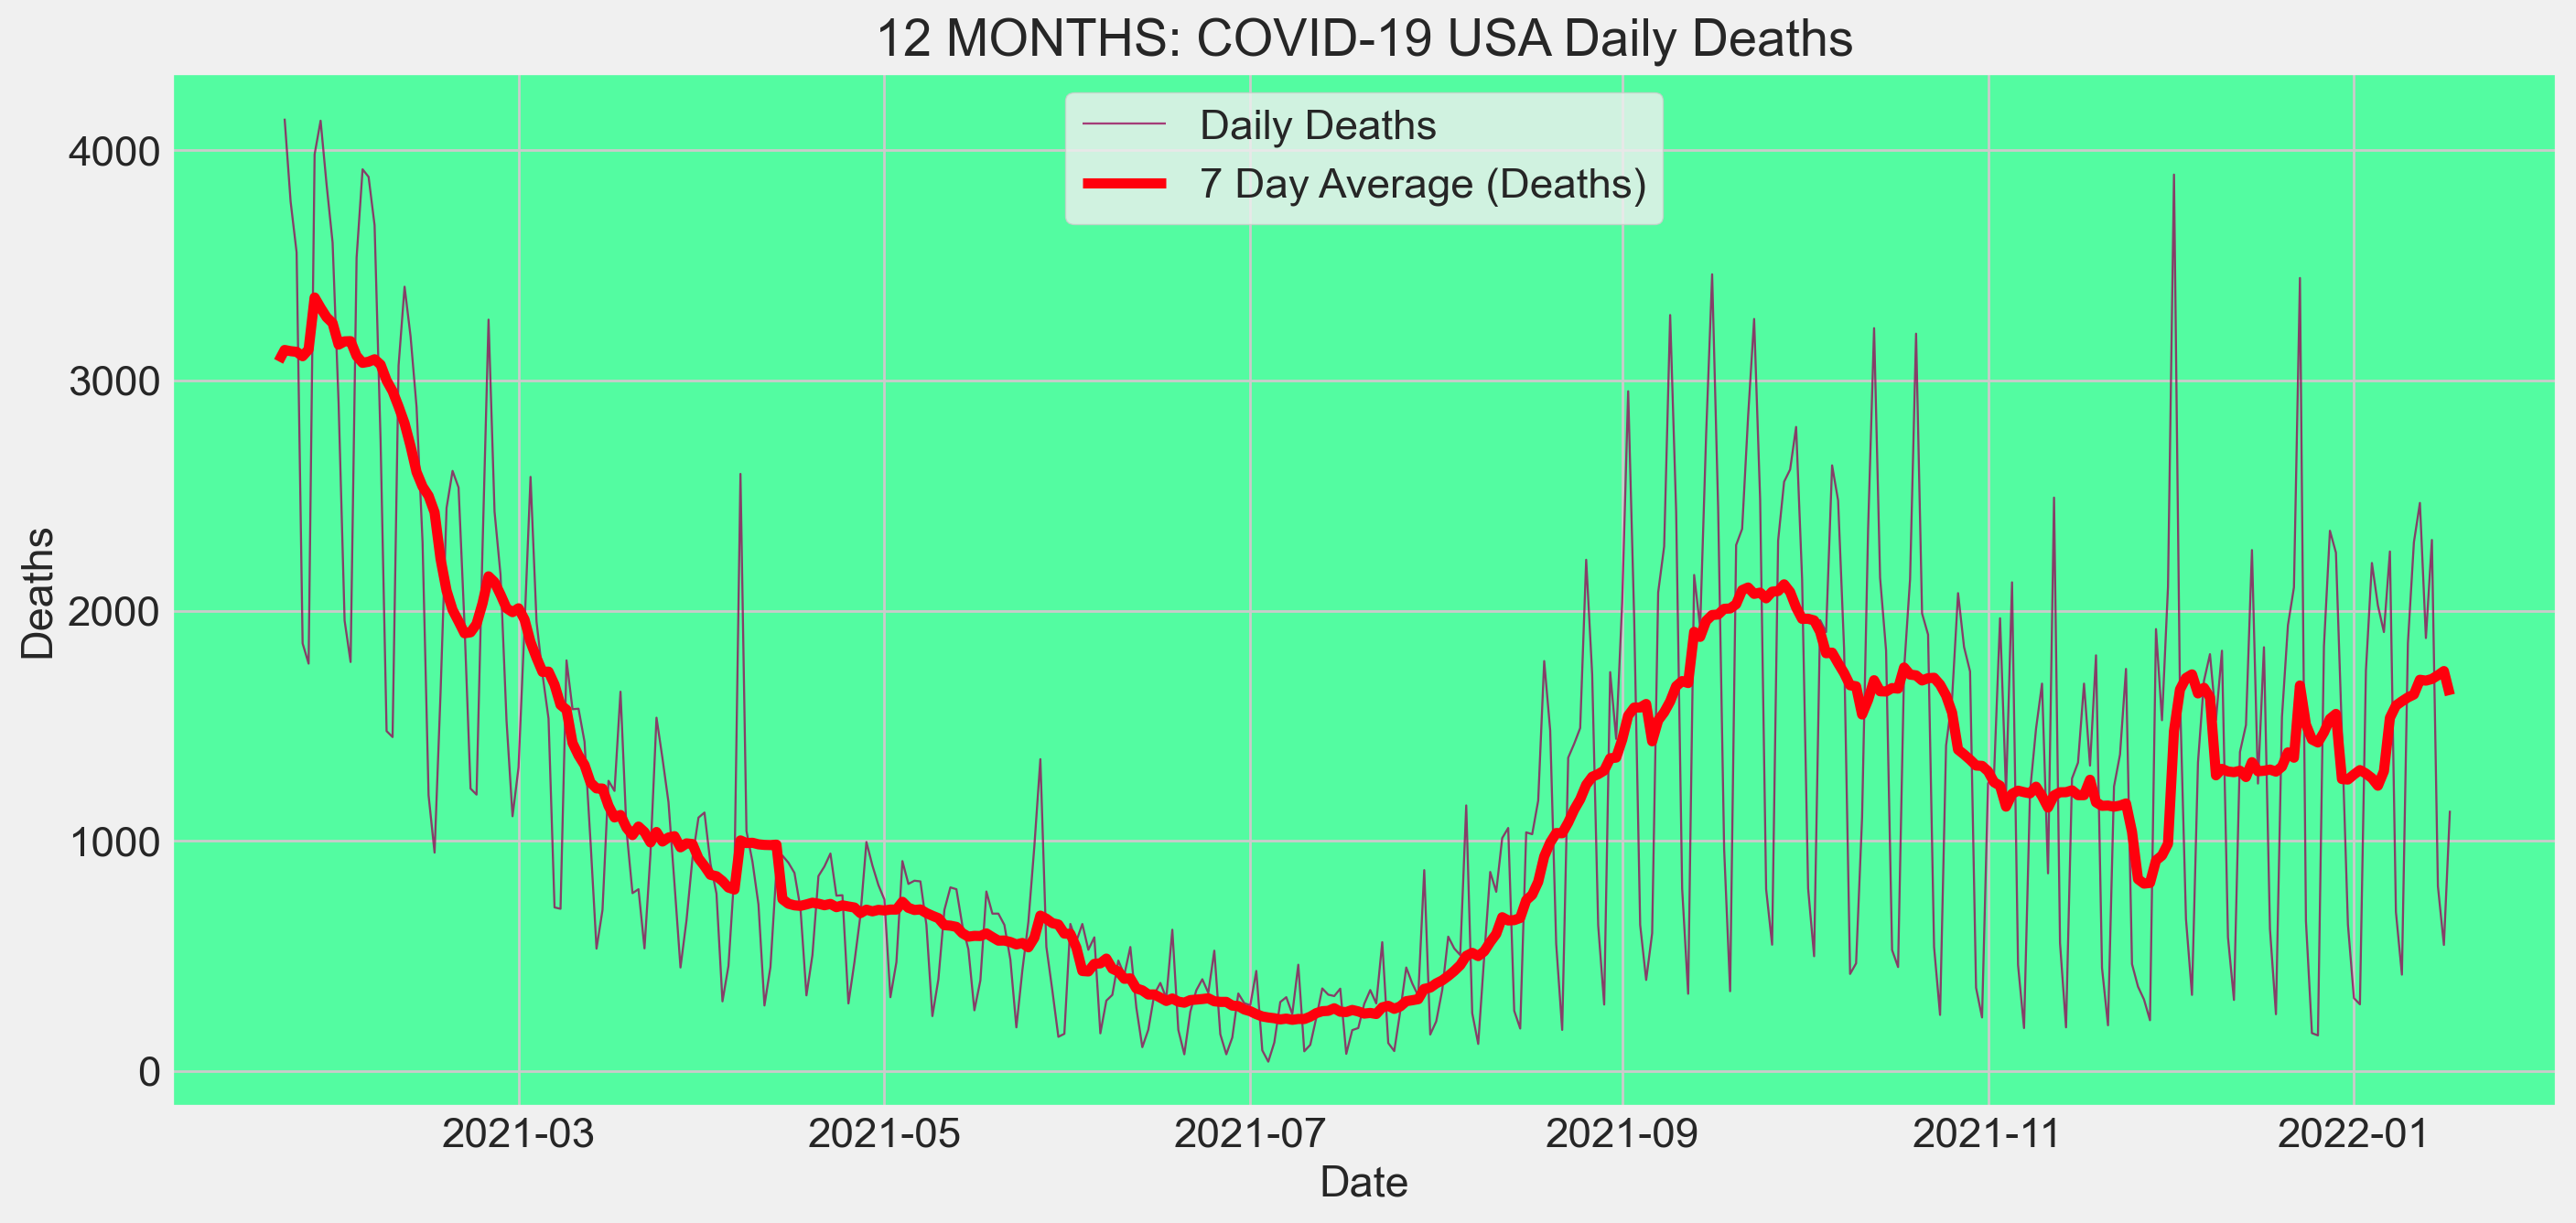

In [6]:
start=today-datetime.timedelta(weeks=52)
end=today
MA7=usa_rolling7.loc[start:]
fig = plt.figure(figsize=(15,7),dpi=200)
x1=usa['total_deaths'].loc[start:].diff(1)
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056',lw=0.83,alpha=0.75, label='Daily Deaths')
ax=sns.lineplot(data=MA7, x=MA7.index,y=MA7,color='#ff000d',label='7 Day Average (Deaths)')
ax.set_title('12 MONTHS: COVID-19 USA Daily Deaths')
ax.set_facecolor('xkcd:sea green')
ax.set_ylabel("Deaths")
ax.set_xlabel("Date")
# fig.savefig(f'{today}_covid19_deaths.png',dpi=165, bbox_inches='tight')

Text(0.5, 0, 'Date')

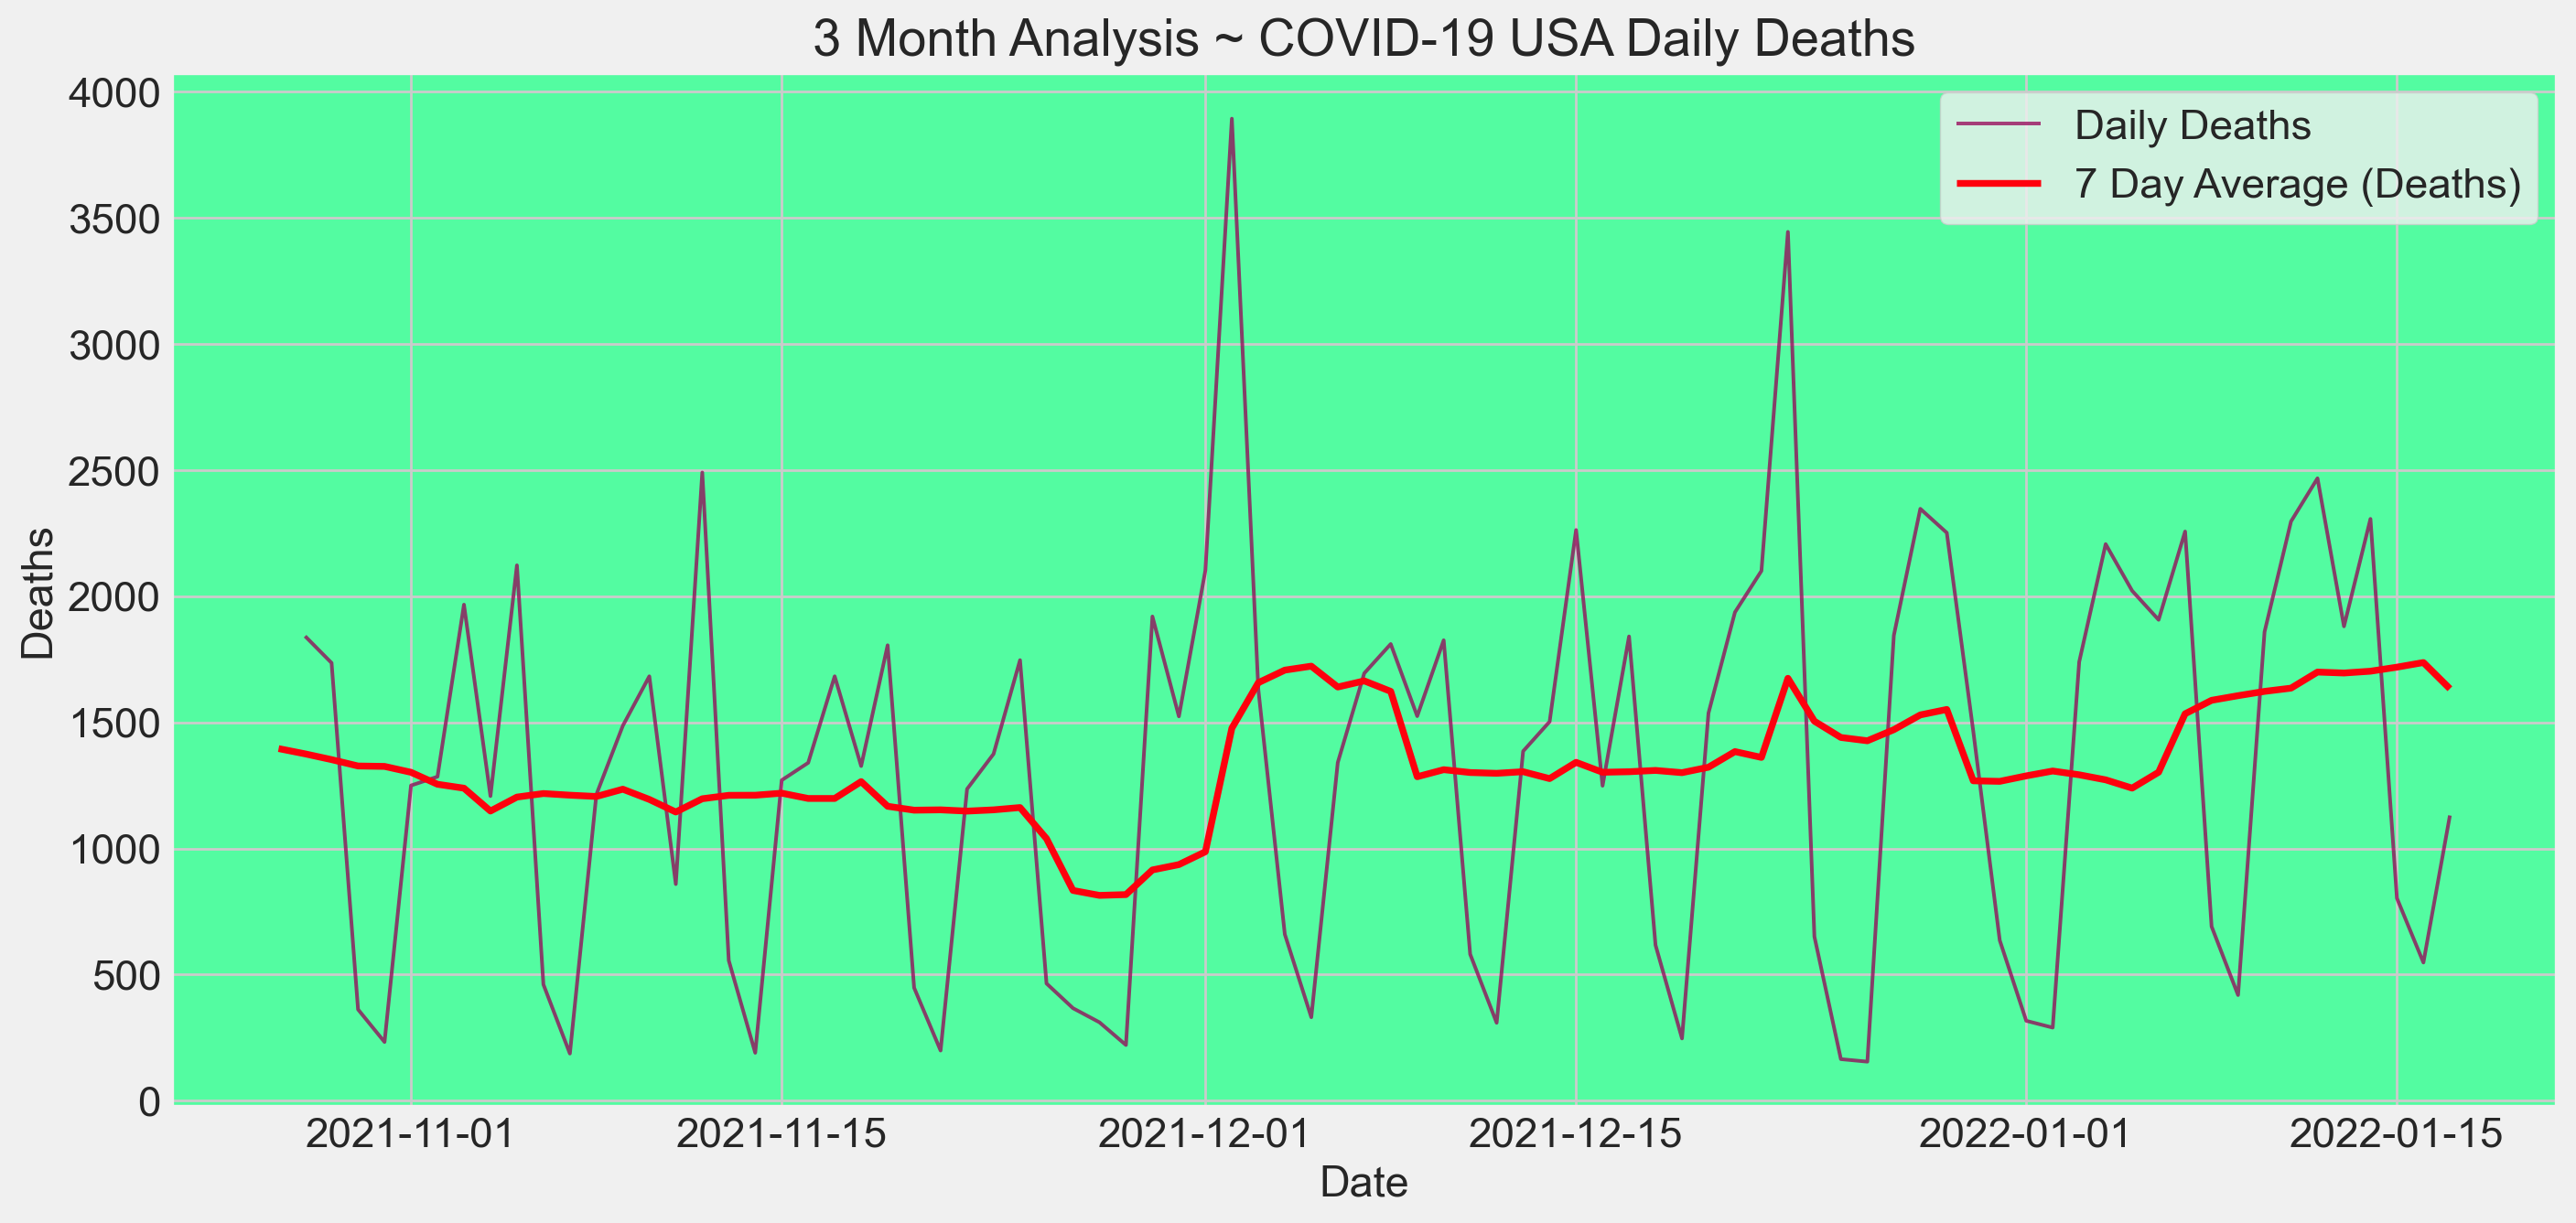

In [8]:
start=today-datetime.timedelta(weeks=12)
end=today
MA7=usa_rolling7.loc[start:]
fig = plt.figure(figsize=(15,7),dpi=200)
x1=usa['total_deaths'].loc[start:].diff(1)
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056',lw=1.43,alpha=0.75, label='Daily Deaths')
ax=sns.lineplot(data=MA7, x=MA7.index,y=MA7,lw=2.66,color='#ff000d',label='7 Day Average (Deaths)')
ax.set_title('3 Month Analysis ~ COVID-19 USA Daily Deaths')
ax.set_facecolor('xkcd:sea green')
ax.set_ylabel("Deaths")
ax.set_xlabel("Date")
# fig.savefig(f'{today}_covid19_deaths.png',dpi=165, bbox_inches='tight')

Text(0.5, 0, 'Date')

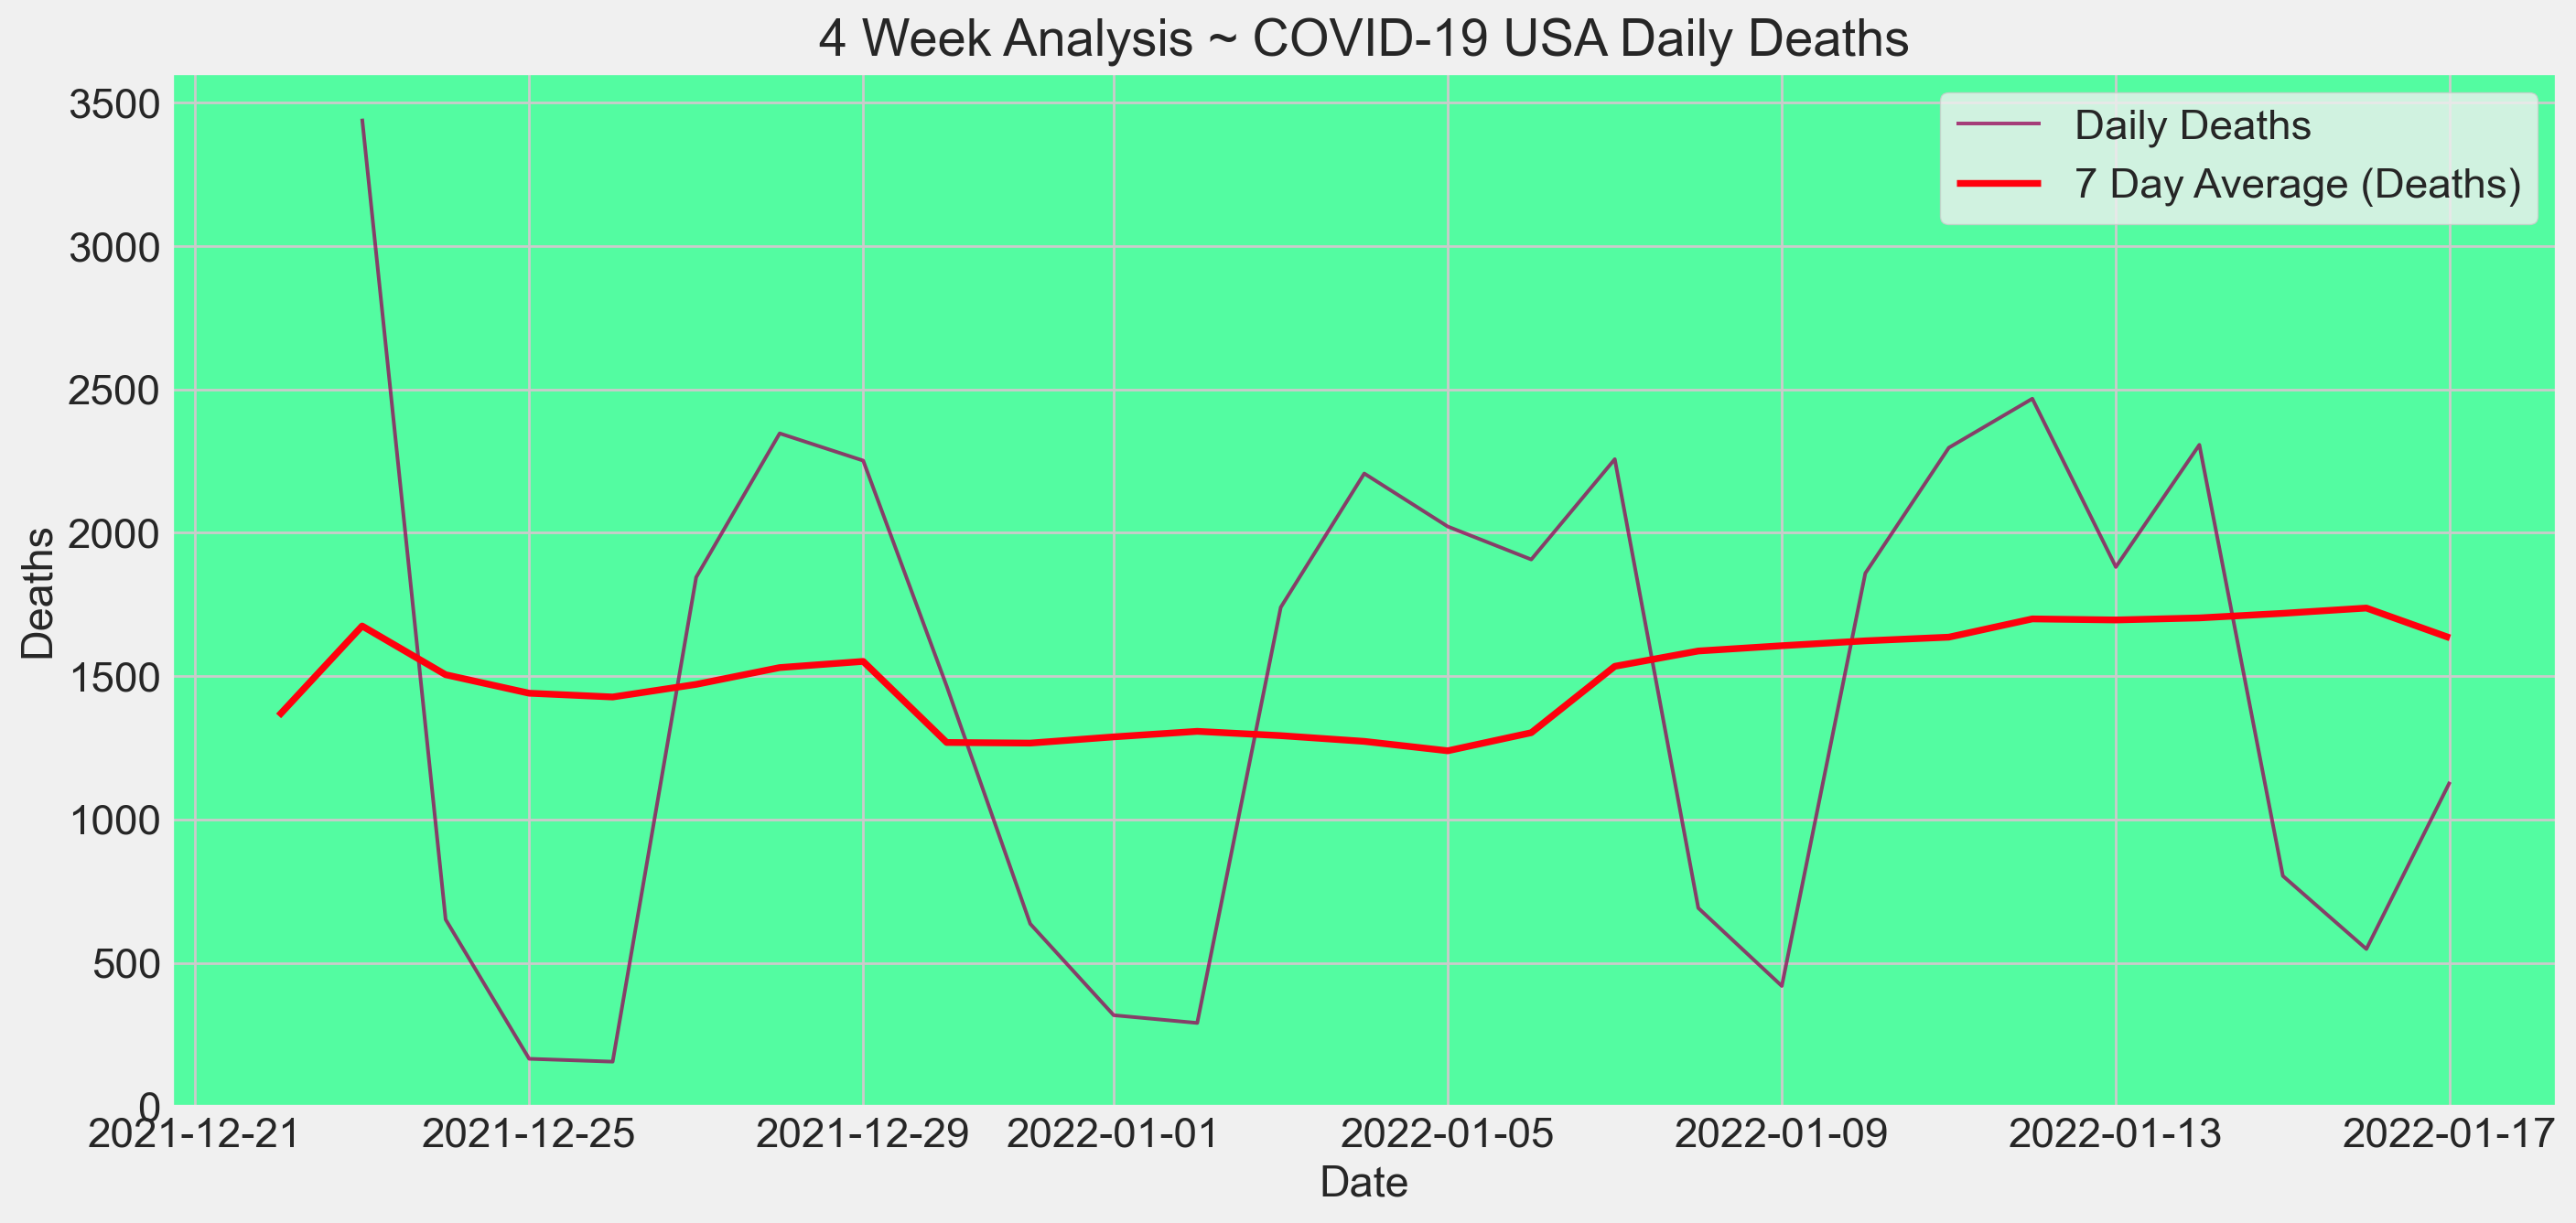

In [10]:
start=today-datetime.timedelta(weeks=4)
end=today
MA7=usa_rolling7.loc[start:]
fig = plt.figure(figsize=(15,7),dpi=200)
x1=usa['total_deaths'].loc[start:].diff(1)
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056',lw=1.43,alpha=0.75, label='Daily Deaths')
ax=sns.lineplot(data=MA7, x=MA7.index,y=MA7,lw=2.66,color='#ff000d',label='7 Day Average (Deaths)')
ax.set_title('4 Week Analysis ~ COVID-19 USA Daily Deaths')
ax.set_facecolor('xkcd:sea green')
ax.set_ylabel("Deaths")
ax.set_xlabel("Date")
# fig.savefig(f'{today}_covid19_deaths.png',dpi=165, bbox_inches='tight')

# <font color='slateblue'> Deadliest COVID-19 day in USA

In [9]:
print(f"{usa_daily.max():,.0f}"," deaths occurred on ",usa_daily.idxmax().strftime("%B, %d, %Y") )

4,442  deaths occurred on  January, 20, 2021
